In [2]:
import sys
sys.path.append('/home/chasenberg/repos/')
from dopy.dolearn.sklearn_utils import plot_roc_curve, plot_classifier_output, plot_correlations

/opt/rh/miniconda/envs/py3root6/lib/python3.4/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

import os, sys, time, random

from ROOT import TTree, TFile

# from root_numpy import root2array, rec2array, array2root

import pandas as pd
import numpy as np
import scipy 
import root_pandas as rp
import root_numpy as ry 

import pandas.core.common as com
from pandas.core.index import Index
from pandas.tools import plotting
from pandas.tools.plotting import scatter_matrix

from tqdm import tqdm_notebook

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import Imputer, StandardScaler
from sklearn.externals import joblib
from sklearn.metrics import classification_report, roc_curve, auc, roc_auc_score

sys.path.append('/home/chasenberg/repos/')
sys.path.append('/home/chasenberg/repos/dopy')
from dopy import * 
from dopy.dolearn.sklearn_utils import plot_roc_curve, plot_classifier_output, plot_correlations
from dopy.dolearn.sklearn_utils import plot_feature_importances, plot_classifier_output, classify_unseen_data
#from dopy.sklearn_utils import plot_bdt_vars
from dopy.doplot.plotting import Plotter, Plot
from dopy.doanalysis.df_utils import add_min_max, add_eta 

In [5]:
test_df = rp.read_root('/fhgfs/users/chasenberg/data/2015_2016/jpsiks/Bd2JpsiKS_data_2015_2016_flattened_BDTresponse_sw.root',key='Bd2JpsiKs')

BDTresponse>-2.0


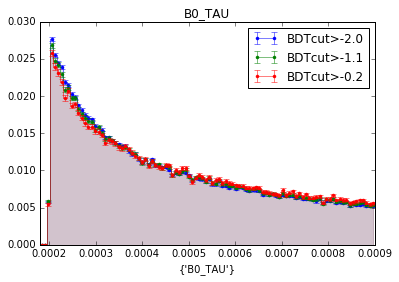

BDTresponse>-1.1


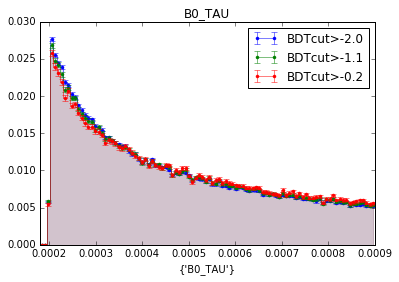

BDTresponse>-0.2


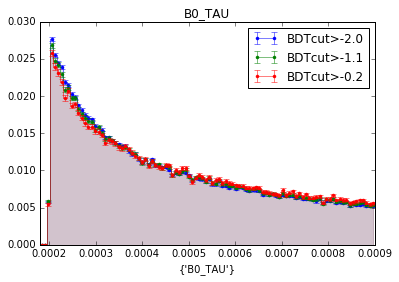

In [73]:
bdt_cuts = np.linspace(-2,-0.2,3)

for cut in bdt_cuts:
    cut_string = 'BDTresponse>'+str(cut)
    print(cut_string)
    p = Plotter('/home/chasenberg/plots/selection/check_tau')
    p.create_plots([test_df.query('BDTresponse>'+str(bdt_cuts[0])),test_df.query('BDTresponse>'+str(bdt_cuts[1])),test_df.query('BDTresponse>'+str(bdt_cuts[2]))],'B0_TAU', weightvars=['SigYield_sw','SigYield_sw','SigYield_sw'],component_labels=['BDTcut>'+str(bdt_cuts[0]),'BDTcut>'+str(bdt_cuts[1]),'BDTcut>'+str(bdt_cuts[2])])
    p['B0_TAU'].set_range(0.00018, 0.0009)
    #bdt_plot.plot()
    p.plot()

In [6]:
test_df['SigYield_sw']

0         -0.538121
1         -0.538121
2         -0.538121
3         -0.540789
4         -0.540789
5          8.333375
6          8.333375
7          8.333375
8          8.370676
9          8.370676
10         3.592536
11         3.592536
12        -3.202405
13        -0.537065
14         8.447324
15         8.447324
16        -0.696883
17        -0.696883
18        -0.696883
19        -0.696883
20         2.754087
21         0.950604
22         0.950604
23         0.950604
24         9.121863
25        -3.011013
26        -3.011013
27        -3.011013
28        -3.011013
29         4.006087
             ...   
2072832   -0.542790
2072833   -0.542790
2072834   -0.542790
2072835   -0.542790
2072836   -0.542790
2072837   -0.542790
2072838   -0.542790
2072839   -0.542790
2072840   -0.542790
2072841   -0.542790
2072842   -0.542790
2072843   -0.542790
2072844   -0.542790
2072845   -0.542790
2072846   -0.542790
2072847   -0.542790
2072848   -0.542790
2072849   -0.542790
2072850   -0.542790
